In [ ]:
## Choropleth Function and For Loop for L Line Stations

I am writing a function and for loop code to run choropleths of the foreign born populations around the station areas of L Line Stations we are studying.

In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
gdf = gpd.read_file('acs_11_19_B01003_B05007.geojson')

In [4]:
list(gdf)

['FIPS',
 'Census Tract',
 '11 Total Population',
 '11 Total Foreign Born',
 '11 Total Entered 2000 or later',
 '11 Europe',
 '11 Europe Entered 2000 or later',
 '11 Asia',
 '11 Asia Entered 2000 or later',
 '11 Latin America',
 '11 Caribbean',
 '11 Caribbean Entered 2000 or later',
 '11 Central America',
 '11 Mexico',
 '11 Mexico Entered 2000 or later',
 '11 Other Central America',
 '11 Other Central America 2000 or later',
 '11 South America',
 '11 South America Entered 2000 or later',
 '11 Other areas',
 '11 Other areas Entered 2000 or later',
 '19 Total Population',
 '19 Total Foreign Born',
 '19 Total Entered 2010 or later',
 '19 Europe',
 '19 Europe Entered 2010 or later',
 '19 Asia',
 '19 Asia Entered 2010 or later',
 '19 Latin America',
 '19 Caribbean',
 '19 Caribbean entered 2010 or later',
 '19 Central America',
 '19 Mexico',
 '19 Mexico Entered 2010 or later',
 '19 Other Central America',
 '19 Other Central America Entered 2010 or later',
 '19 South America',
 '19 South Amer

In [5]:
gdf.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,...,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry
0,"Census Tract 1011.10, Los Angeles, CA",4283,2027.0,432.0,432.0,93.0,15.0,1467.0,303.0,449.0,...,446.0,310.0,0.0,19.0,0.0,109.0,26.0,29.0,-7.195213,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,"Census Tract 1011.22, Los Angeles, CA",3405,1254.0,87.0,87.0,144.0,0.0,1026.0,87.0,66.0,...,24.0,0.0,0.0,24.0,0.0,0.0,0.0,21.0,-11.200293,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,"Census Tract 1012.10, Los Angeles, CA",6347,3471.0,1168.0,1168.0,39.0,0.0,1919.0,561.0,1458.0,...,1137.0,499.0,0.0,505.0,73.0,114.0,0.0,88.0,-3.265223,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,"Census Tract 1012.20, Los Angeles, CA",3702,1242.0,247.0,247.0,61.0,0.0,673.0,98.0,437.0,...,519.0,334.0,0.0,136.0,25.0,8.0,0.0,18.0,2.097513,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,"Census Tract 1013, Los Angeles, CA",3884,1374.0,156.0,156.0,97.0,0.0,1168.0,141.0,62.0,...,110.0,27.0,0.0,56.0,0.0,27.0,0.0,83.0,9.362702,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [6]:
gdf2 = gpd.read_file('acs_merged.geojson')

In [7]:
gdf2.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",5012.0,2027.0,93.0,15.0,1467.0,303.0,449.0,0.0,...,310.0,26.0,19.0,0.0,109.0,24.0,29.0,0.0,-7.195213,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3584.0,1254.0,144.0,0.0,1026.0,87.0,66.0,8.0,...,0.0,0.0,24.0,0.0,0.0,0.0,21.0,0.0,-11.200293,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6529.0,3471.0,39.0,0.0,1919.0,561.0,1458.0,0.0,...,499.0,0.0,505.0,73.0,114.0,0.0,88.0,0.0,-3.265223,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",2751.0,1242.0,61.0,0.0,673.0,98.0,437.0,10.0,...,334.0,0.0,136.0,25.0,8.0,0.0,18.0,0.0,2.097513,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,06037101300,"Census Tract 1013, Los Angeles, CA",4123.0,1374.0,97.0,0.0,1168.0,141.0,62.0,0.0,...,27.0,0.0,56.0,0.0,27.0,0.0,83.0,0.0,9.362702,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Going to move ahead using the acs_merged dataset since I see that Kevin used that for his Final Charts. 

In [8]:
# updating the gdf variable to be the acs_merged dataset 

gdf = gpd.read_file('acs_merged.geojson')

### Creating a single choropleth map

To make sure everything is running smoothly, I'm going to run a single choropleth map for Chinatown, just as we did for the midterm.

In [9]:
chinatown = gdf[gdf["FIPS"].isin(['06037206010', 
                                       '06037207103', 
                                       '06037207102',
                                       '06037206020']
                                      )
                     ]

In [10]:
chinatown.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry
529,06037206010,"Census Tract 2060.10, Los Angeles, CA",2947.0,1661.0,18.0,0.0,926.0,290.0,714.0,11.0,...,748.0,13.0,166.0,0.0,0.0,0.0,0.0,0.0,-6.398801,"MULTIPOLYGON (((-118.23924 34.06726, -118.2380..."
530,06037206020,"Census Tract 2060.20, Los Angeles, CA",7677.0,1404.0,14.0,0.0,189.0,17.0,1187.0,55.0,...,448.0,14.0,232.0,23.0,9.0,0.0,20.0,0.0,-6.284370,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378..."
537,06037207102,"Census Tract 2071.02, Los Angeles, CA",2276.0,1753.0,1.0,0.0,1592.0,799.0,160.0,38.0,...,181.0,0.0,114.0,0.0,25.0,13.0,1.0,0.0,-14.239135,"MULTIPOLYGON (((-118.24303 34.05735, -118.2429..."
538,06037207103,"Census Tract 2071.03, Los Angeles, CA",2098.0,1728.0,0.0,0.0,1688.0,626.0,22.0,0.0,...,12.0,0.0,18.0,0.0,40.0,11.0,6.0,0.0,-13.454837,"MULTIPOLYGON (((-118.24557 34.06470, -118.2454..."


<AxesSubplot:>

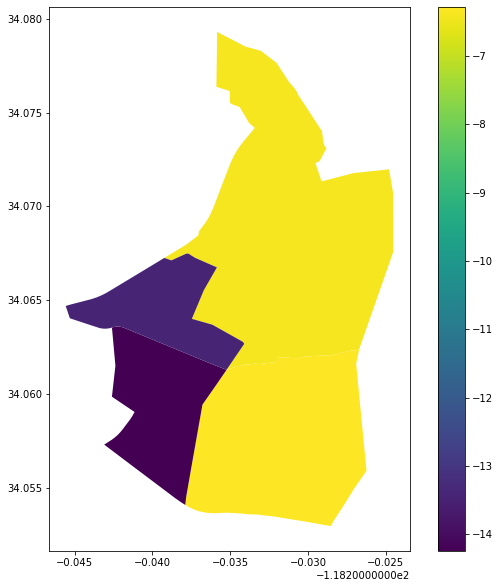

In [11]:
chinatown.plot(figsize=(10,10),
        column='% Change Foreign Born',
        legend=True)

In [12]:
chinatown_web_mercator = chinatown.to_crs(epsg=3857)

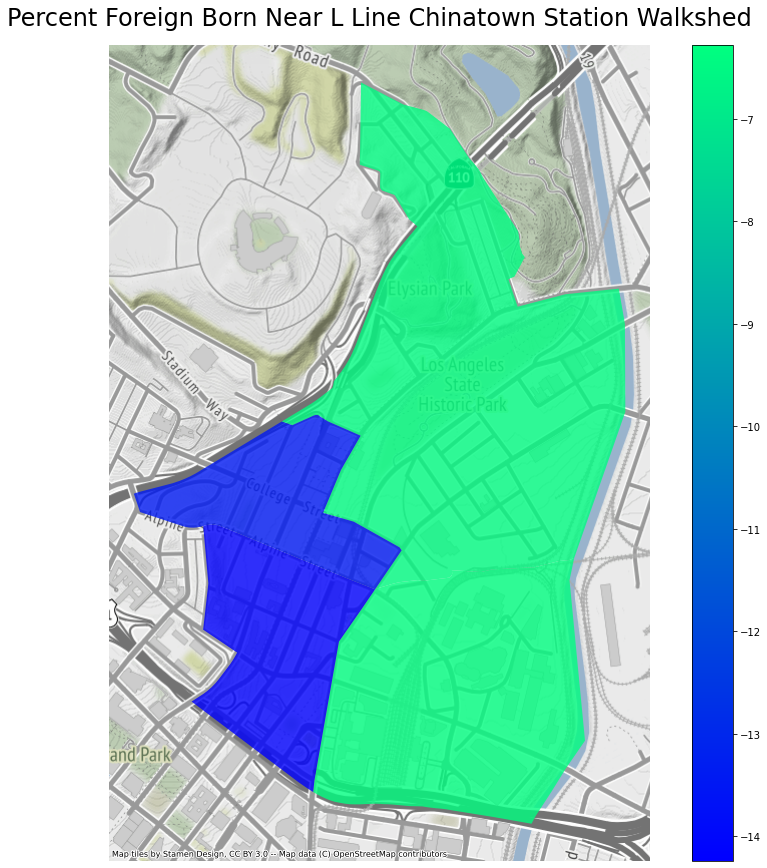

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
 
chinatown_web_mercator.plot(
                    column='% Change Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Chinatown Station Walkshed',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)

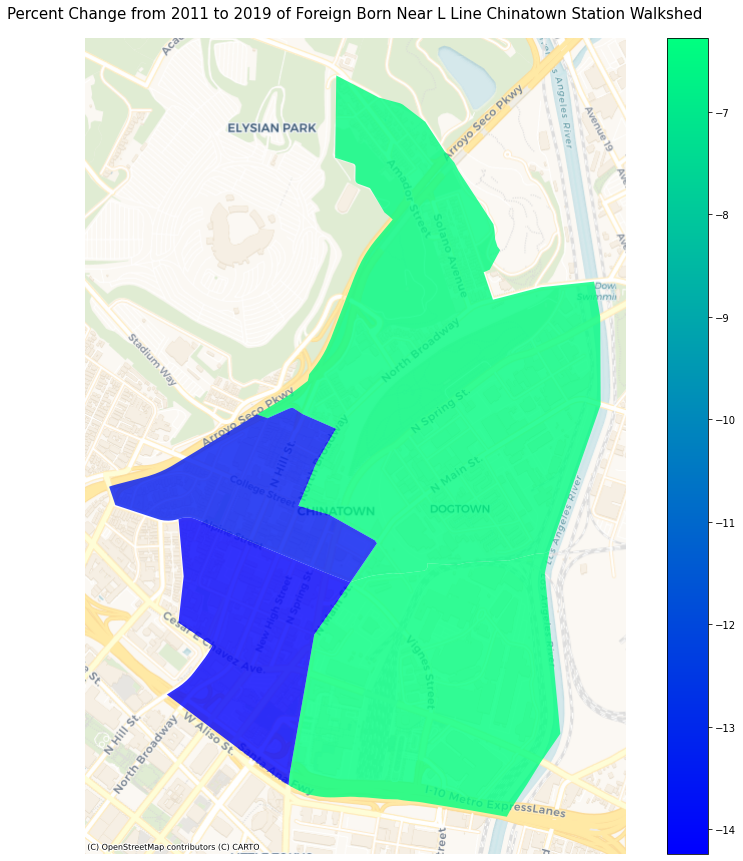

In [14]:
# Again, but with a new base map and updated title font size

fig, ax = plt.subplots(figsize=(15, 15))
 
chinatown_web_mercator.plot(
                    column='% Change Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Change from 2011 to 2019 of Foreign Born Near L Line Chinatown Station Walkshed',fontsize=15, pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

Okay, we're definitely able to create choropleths with this data. Now to write a function to run all our station areas. First, I will code a function and run it to see if it works. Then I will create a list with just the Chinatown Station, write a for loop, and run it to see if it works. If everything looks good, I will finally add my other stations to the list and run it again - with the final outcome being a choropleth similar to the one we have above.

In [15]:
stations = [chinatown]

In [16]:
station = ['Chinatown Station', 'Chinatown Station', 'Chinatown Station', 'Chinatown Station']

In [17]:
chinatown['station'] = station

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [18]:
chinatown.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry,station
529,06037206010,"Census Tract 2060.10, Los Angeles, CA",2947.0,1661.0,18.0,0.0,926.0,290.0,714.0,11.0,...,13.0,166.0,0.0,0.0,0.0,0.0,0.0,-6.398801,"MULTIPOLYGON (((-118.23924 34.06726, -118.2380...",Chinatown Station
530,06037206020,"Census Tract 2060.20, Los Angeles, CA",7677.0,1404.0,14.0,0.0,189.0,17.0,1187.0,55.0,...,14.0,232.0,23.0,9.0,0.0,20.0,0.0,-6.284370,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378...",Chinatown Station
537,06037207102,"Census Tract 2071.02, Los Angeles, CA",2276.0,1753.0,1.0,0.0,1592.0,799.0,160.0,38.0,...,0.0,114.0,0.0,25.0,13.0,1.0,0.0,-14.239135,"MULTIPOLYGON (((-118.24303 34.05735, -118.2429...",Chinatown Station
538,06037207103,"Census Tract 2071.03, Los Angeles, CA",2098.0,1728.0,0.0,0.0,1688.0,626.0,22.0,0.0,...,0.0,18.0,0.0,40.0,11.0,6.0,0.0,-13.454837,"MULTIPOLYGON (((-118.24557 34.06470, -118.2454...",Chinatown Station


### Writing a function

In [20]:
def stn_map(station = 'Chinatown Station', column = '% Change Foreign Born'):
    
    #this station
    this_stn = [chinatown[chinatown['station']==station]]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    chinatown.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

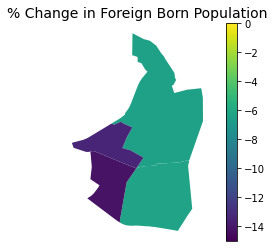

In [21]:
stn_map()

I got it to map Chinatown but I had to do "chinatown.plot". That's not going to work for our for loop. In order for our for loop to work, our function needs to reference our gdf in the function. To do this we  need to have a "station" column much like I made for the chinatown subset so that it knows which rows to pull when it's trying to map. 

The index numbers for Chinatown are 529, 530, 537, 538

In [29]:
gdf.loc[529, 'station'] = "Chinatown Station"

In [30]:
gdf.loc[529]

FIPS                                                                                    06037206010
Census Tract                                                  Census Tract 2060.10, Los Angeles, CA
11 Total Population                                                                          2947.0
11 Total Foreign Born                                                                        1661.0
11 Europe                                                                                      18.0
11 Europe Entered 2000 or later                                                                 0.0
11 Asia                                                                                       926.0
11 Asia Entered 2000 or later                                                                 290.0
11 Latin America                                                                              714.0
11 Caribbean                                                                                   11.0


There it is at the end! I used [this](https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column) resource from stack overflow

In [31]:
gdf.loc[530, 'station'] = "Chinatown Station"

In [32]:
gdf.loc[537, 'station'] = "Chinatown Station"

In [33]:
gdf.loc[538, 'station'] = "Chinatown Station"

In [35]:
gdf.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry,station
0,06037101110,"Census Tract 1011.10, Los Angeles, CA",5012.0,2027.0,93.0,15.0,1467.0,303.0,449.0,0.0,...,26.0,19.0,0.0,109.0,24.0,29.0,0.0,-7.195213,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",NaN
1,06037101122,"Census Tract 1011.22, Los Angeles, CA",3584.0,1254.0,144.0,0.0,1026.0,87.0,66.0,8.0,...,0.0,24.0,0.0,0.0,0.0,21.0,0.0,-11.200293,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",NaN
2,06037101210,"Census Tract 1012.10, Los Angeles, CA",6529.0,3471.0,39.0,0.0,1919.0,561.0,1458.0,0.0,...,0.0,505.0,73.0,114.0,0.0,88.0,0.0,-3.265223,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",NaN
3,06037101220,"Census Tract 1012.20, Los Angeles, CA",2751.0,1242.0,61.0,0.0,673.0,98.0,437.0,10.0,...,0.0,136.0,25.0,8.0,0.0,18.0,0.0,2.097513,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",NaN
4,06037101300,"Census Tract 1013, Los Angeles, CA",4123.0,1374.0,97.0,0.0,1168.0,141.0,62.0,0.0,...,0.0,56.0,0.0,27.0,0.0,83.0,0.0,9.362702,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",NaN


now let's try our function again using gdf and see if it'll produce a map only for Chinatown Station

In [98]:
def stn_map(station = 'Chinatown Station', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

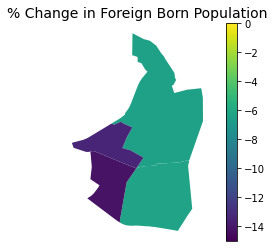

In [99]:
stn_map()

### writing our for loop

In [52]:
## bringing in the chinatown subset again so that the new "station" column copies
chinatown = gdf[gdf["FIPS"].isin(['06037206010', 
                                       '06037207103', 
                                       '06037207102',
                                       '06037206020']
                                      )
                     ]

In [53]:
chinatown.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry,station
529,06037206010,"Census Tract 2060.10, Los Angeles, CA",2947.0,1661.0,18.0,0.0,926.0,290.0,714.0,11.0,...,13.0,166.0,0.0,0.0,0.0,0.0,0.0,-6.398801,"MULTIPOLYGON (((-118.23924 34.06726, -118.2380...",Chinatown Station
530,06037206020,"Census Tract 2060.20, Los Angeles, CA",7677.0,1404.0,14.0,0.0,189.0,17.0,1187.0,55.0,...,14.0,232.0,23.0,9.0,0.0,20.0,0.0,-6.284370,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378...",Chinatown Station
537,06037207102,"Census Tract 2071.02, Los Angeles, CA",2276.0,1753.0,1.0,0.0,1592.0,799.0,160.0,38.0,...,0.0,114.0,0.0,25.0,13.0,1.0,0.0,-14.239135,"MULTIPOLYGON (((-118.24303 34.05735, -118.2429...",Chinatown Station
538,06037207103,"Census Tract 2071.03, Los Angeles, CA",2098.0,1728.0,0.0,0.0,1688.0,626.0,22.0,0.0,...,0.0,18.0,0.0,40.0,11.0,6.0,0.0,-13.454837,"MULTIPOLYGON (((-118.24557 34.06470, -118.2454...",Chinatown Station


In [72]:
stations = [chinatown]

We have a fully operating function, now it's time to write our for loop.

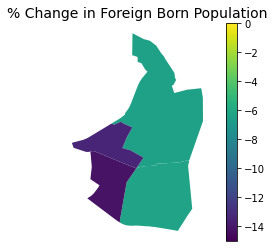

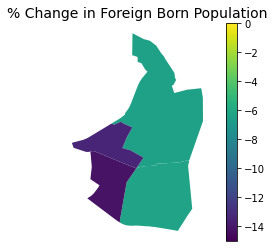

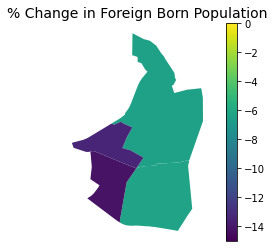

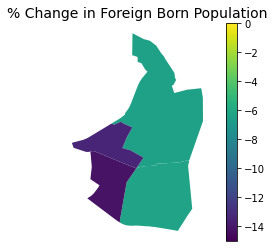

In [49]:
for stop in station:
    stn_map(station = stop)

Okay, so it worked, but, it's making four maps. That's because the for loop is running through the "station" column, and there are four values for Chinatown. How can I change it so that it only produces one map? Let's tweak the function

In [86]:
def stn_map1(stations = 'chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = stations
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

I've tried this_stn=station, stations='chinatown', stop = 'chinatown', = 'chinatown' . What I'm trying to do is make this_stn = stations so it I can use the list that I'll eventually create for the for loop to create choropleths for each station. I can't use stations because it's a list and doesn't have a gdf. How can I call the chinatown gdf within stations to make it equal to this_stn? 

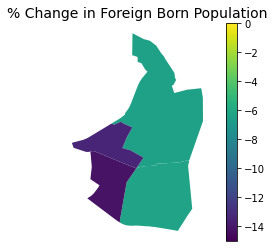

In [88]:
for station in stations:
    stn_map(station = stop)

okay, this worked, but what if we add delmar to our list. Will it successfully run a choropleth for it?

In [89]:
delmar = gdf[gdf["FIPS"].isin(['06037461902',  
                                '06037463602', 
                                '06037463700']
)
            ]

In [103]:
delmar.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,...,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,geometry,station
1360,06037461902,"Census Tract 4619.02, Los Angeles, CA",1306.0,321.0,39.0,2.0,141.0,0.0,113.0,0.0,...,0.0,0.0,0.0,16.0,0.0,28.0,0.0,7.958612,"MULTIPOLYGON (((-118.15570 34.14973, -118.1554...",NaN
1382,06037463602,"Census Tract 4636.02, Los Angeles, CA",5047.0,1613.0,327.0,108.0,851.0,234.0,345.0,86.0,...,19.0,108.0,0.0,21.0,0.0,112.0,100.0,-0.161660,"MULTIPOLYGON (((-118.15046 34.14577, -118.1497...",NaN
1383,06037463700,"Census Tract 4637, Los Angeles, CA",2203.0,295.0,39.0,23.0,184.0,72.0,62.0,0.0,...,0.0,40.0,0.0,25.0,8.0,54.0,0.0,5.793363,"MULTIPOLYGON (((-118.16776 34.14147, -118.1676...",NaN


In [104]:
gdf.loc[1360, 'station'] = "Del Mar"

In [105]:
gdf.loc[1382, 'station'] = "Del Mar"

In [106]:
gdf.loc[1383, 'station'] = "Del Mar"

posx and posy should be finite values
posx and posy should be finite values


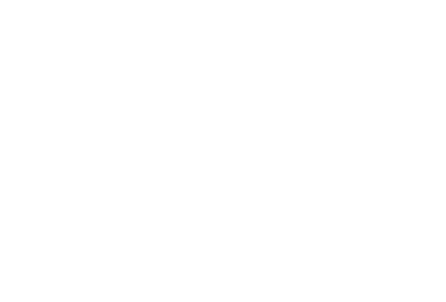

posx and posy should be finite values
posx and posy should be finite values


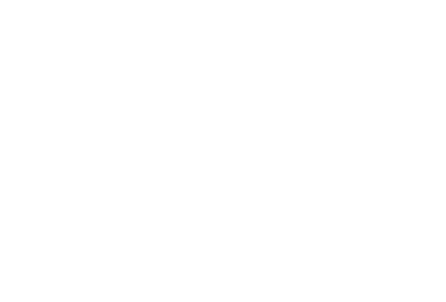

In [113]:
for station in stations:
    stn_map(station = stop)

In [107]:
stations = [chinatown, delmar]

That didn't work, it just produced the same Chinatown map. 

In [102]:
def stn_map2(station = 'Chinatown Station', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

for stop in this_stn:
    stn_map(station = stop)

NameError: name 'this_stn' is not defined

In [115]:
def stn_map3(stations = 'chinatown', column = '% Change Foreign Born'):
    
    #this station
    this_stn = gdf[gdf['station']==station]
                
    # plot it
    fig,ax = plt.subplots()
                
    # have to change the min and max of the legend from what Yoh had because we're dealing with negative numbers in our case.
    # will have to update this to be more inclusive of all stations when I write it again for the loop
    ## ALSO, this was key! I could not get only the station area to plot until I changed the plot to this_stn.plot. 
    ## this is pulling only from the subset of interest, Chinatown Station
    this_stn.plot(ax=ax,
                column=column, 
                vmin=-15,
                vmax=0,
                legend=True)

    ax.axis('off')
    ax.set_title('% Change in Foreign Born Population', fontsize=14)

for stop in stations:
    stn_map(station = stop)

/tmp/ipykernel_366/4252449006.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  this_stn = gdf[gdf['station']==station]
/opt/conda/lib/python3.9/site-packages/geopandas/array.py:917: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/opt/conda/lib/python3.9/site-packages/geopandas/array.py:918: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/opt/conda/lib/python3.9/site-packages/geopandas/array.py:919: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/opt/conda/lib/python3.9/site-packages/geopandas/array.py:920: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer